**Tools - pandas**  
*The `pandas` library provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the **`DataFrame`**, which you can think of as an in-memory 2D table (like a spreadsheet, with column names and row labels). Many features available in Excel are available programmatically, such as creating pivot tables, computing columns based on other columns, plotting graphs, etc. You can also group rows by column value, or join tables much like in SQL. Pandas is also great at handling time series.*

In [1]:
import pandas as pd
import numpy as np

# **`Series`** objects
The pandas library contains these useful data structures:

- `Series` objects. A Series object is 1D array, similar to a column in a spreadsheet (with a column name and row labels).
- `DataFrame` objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).
- `Panel` objects. You can see a Panel as a dictionary of DataFrames. These are less used, so we will not discuss them here.

## Creating a **`Series`**

In [2]:
s = pd.Series([2, -1, 3, 5])
s

0    2
1   -1
2    3
3    5
dtype: int64

`Series` objects behave similar to 1-dimensional NumPy `ndarray`s, can often pass them as parameters to NumPy functions:

In [3]:
np.exp(s) #Use series in a NumPy function
s < 0 #Binary Operations on Series

0    False
1     True
2    False
3    False
dtype: bool

### Initiate from `dict`
You can create a Series object from a dict. The keys will be used as index labels:

In [4]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

### Initiate with a scalar
You can also initialize a `Series` object using a scalar and a list of index labels: all items will be set to the scalar.

In [5]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

### `Series` name
A `Series` can have a `name`:

In [6]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## Index Label
Each item in a `Series` object has a unique identifier called the *index label*. By default, it is simply the rank of the item in the `Series` (starting at `0`) but you can also set the index labels manually:

In [7]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

You can then use the `Series` just like a `dict`:

In [8]:
s2["bob"]

83

To make it clear when you are accessing by label or by integer location, it is recommended to always use the `loc` attribute when accessing by label, and the `iloc` attribute when accessing by integer location.

In [9]:
s2.loc["bob"]

83

In [10]:
s2.iloc[1]

83

Slicing a `Series` also slices the index labels.

In [11]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

## Plotting a **`Series`**
Pandas makes it easy to plot `Series` data using matplotlib. Just import matplotlib and call the plot() method:

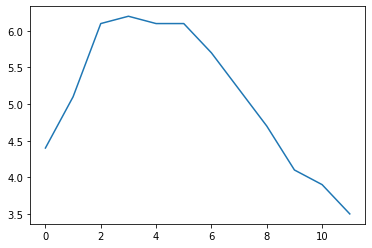

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

## Time-Series Range
Let's start by creating a time series using `pd.date_range()`. This returns a `DatetimeIndex` containing one datetime per hour for 12 hours starting on October 29th 2016 at 5:30pm.

In [13]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

This `DatetimeIndex` may be used as an index in a `Series`:

In [14]:
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

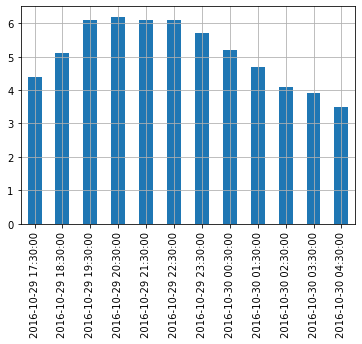

In [15]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

### Resampling
Pandas lets us resample a time series very simply. Just call the `resample()` method and specify a new frequency:

In [16]:
temp_series_freq_2H = temp_series.resample("2H").mean()
#Can use different operations, like mean, min, max
temp_series_freq_2H

2016-10-29 16:00:00    4.40
2016-10-29 18:00:00    5.60
2016-10-29 20:00:00    6.15
2016-10-29 22:00:00    5.90
2016-10-30 00:00:00    4.95
2016-10-30 02:00:00    4.00
2016-10-30 04:00:00    3.50
Freq: 2H, dtype: float64

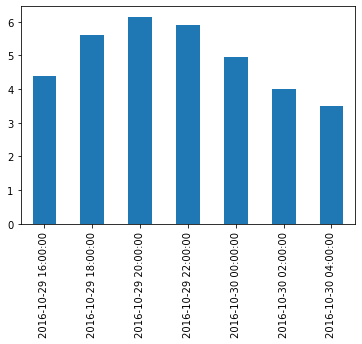

In [17]:
temp_series_freq_2H.plot(kind="bar")
plt.show()

### Upsampling and Interpolation
We can also upsample (ie. increase the frequency), but this creates holes in our data:

In [18]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10) # `head` displays the top n values

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

One solution is to fill the gaps by interpolating. We just call the `interpolate()` method. The default is to use linear interpolation, but we can also select another method, such as cubic interpolation:

In [19]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.452911
2016-10-29 18:00:00    4.605113
2016-10-29 18:15:00    4.829758
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.388992
2016-10-29 19:00:00    5.669887
2016-10-29 19:15:00    5.915839
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.203621
Freq: 15T, dtype: float64

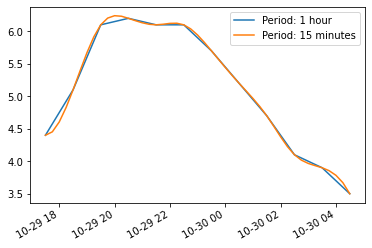

In [20]:
temp_series.plot(label="Period: 1 hour")
temp_series_freq_15min.plot(label="Period: 15 minutes")
plt.legend()
plt.show()

### Periods
The `pd.period_range()` function returns a `PeriodIndex` instead of a `DatetimeIndex`. For example, let's get all quarters in 2016 and 2017:

In [21]:
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

The `asfreq()` method lets us change the frequency of the `PeriodIndex`. All periods are lengthened or shortened accordingly. For example, let's convert all the quarterly periods to monthly periods (zooming in):

In [22]:
quarters.asfreq("M")

PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]', freq='M')

# **`DataFrame`** objects
A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. You can see a `DataFrame` as a dictionary of `Series`.

## Creating a **`DataFrame`**

### Initialising from `dict` of `Series`
A few things to note:
- the Series were automatically aligned based on their index,
- missing values are represented as NaN,
- Series names are ignored (the name "year" was dropped),

In [23]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


### Initialising from `ndarray`

In [24]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


### Initialising from `dict`

In [25]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


## Row/Columns Operations

### Accessing Rows

In [26]:
people.loc["charles"]

birthyear    1992
hobby         NaN
weight        112
children        0
Name: charles, dtype: object

In [27]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


Can pass a boolean array to get the matching rows

In [28]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


In [29]:
people[people["birthyear"] < 1990]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0


### Adding/Removing Columns

In [30]:
people["age"] = 2018 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


In [31]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

When adding a new column, it is added at the end (on the right) by default. You can also insert a column anywhere else using the `insert()` method:

In [32]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30
alice,Biking,172,68,33,True
bob,Dancing,181,83,34,True
charles,NaN,185,112,26,False


### Assigning New Columns
You can also create new columns by calling the `assign()` method. Note that this returns a new `DataFrame` object, the original is not modified:

In [33]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    is_heavy = people["weight"] > 80
)

,hobby,height,weight,age,over 30,body_mass_index,is_heavy
alice,Biking,172,68,33,True,22.985398,False
bob,Dancing,181,83,34,True,25.335002,True
charles,NaN,185,112,26,False,32.724617,True


In [34]:
(people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

,hobby,height,weight,age,over 30,body_mass_index,overweight
alice,Biking,172,68,33,True,22.985398,False
bob,Dancing,181,83,34,True,25.335002,True
charles,NaN,185,112,26,False,32.724617,True


## Operations on **`DataFrame`**

### Querying a **`DataFrame`**
The `query()` method lets you filter a `DataFrame` based on a query expression

In [35]:
people.query("age > 30 and weight >= 80")

,hobby,height,weight,age,over 30
bob,Dancing,181,83,34,True


### Sorting a **`DataFrame`**
You can sort a `DataFrame` by calling its `sort_index` method. By default it sorts the rows by their index label, in ascending order.

In [36]:
people.sort_index(axis=1, inplace=True, ascending=False)

In [37]:
people.sort_values(by="age", inplace=True)
people

,weight,over 30,hobby,height,age
charles,112,False,NaN,185,26
alice,68,True,Biking,172,33
bob,83,True,Dancing,181,34


## Plotting a **`DataFrame`**
See the full guide at [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) page

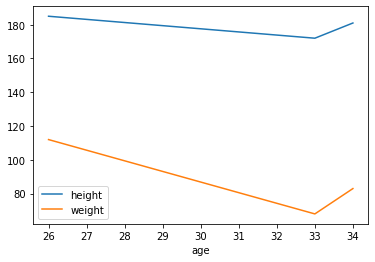

In [38]:
people.plot(kind = "line", x = "age", y = ["height", "weight"])
plt.show()

## Math Operations on `DataFrame`

In [39]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [40]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


In [41]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


Most of these functions take an optional `axis` parameter which lets you specify along which axis of the `DataFrame` you want the operation executed. The default is `axis=0`, meaning that the operation is executed on each column. You can set `axis=1` to execute the operation on each row.
- `all`: checks whether all values are `True`  
- `any`: checks if any value is `True`  

In [42]:
(grades > 5).all(axis=0)

sep    False
oct     True
nov    False
dtype: bool

In [43]:
(grades == 10).any(axis=1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

## Handling Missing Data
Dealing with missing data is a frequent task when working with real life data. Pandas offers a few tools to handle missing data.

Let's try to fix the problem above. For example, we can decide that missing data should result in a zero, instead of `NaN`. We can replace all `NaN` values by a any value using the `fillna()` method:

In [44]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,np.nan],[0, 1, 0], [3, 2, np.nan]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,NaN
darwin,0.0,1.0,0.0
charles,3.0,2.0,NaN


In [45]:
bonus_points.fillna(99) #Fills NaN values with 99

,oct,nov,dec
bob,0.0,99.0,2.0
colin,99.0,1.0,99.0
darwin,0.0,1.0,0.0
charles,3.0,2.0,99.0


### **`interpolate`**
Using the `interpolate` method, it interpolates vertically (axis=0), so let's tell it to interpolate horizontally (axis=1).

In [46]:
better_bonus_points = bonus_points.interpolate(axis=1)
better_bonus_points

,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,1.0
darwin,0.0,1.0,0.0
charles,3.0,2.0,2.0


### **`dropna`**
Use `dropna()` method to get rid of rows with `NaN`s

In [47]:
bonus_points.dropna(how="all") #drops rows with ALL NaN
bonus_points.dropna() #drops rows with ANY NaN

,oct,nov,dec
darwin,0.0,1.0,0.0


## Aggregating with **`groupby`**

In [48]:
final_grades = grades + better_bonus_points
final_grades.fillna(10, inplace=True)
final_grades["hobby"] = ["Biking", "Dancing", "Biking", "Dancing", "Cycling"]
final_grades

,dec,nov,oct,sep,hobby
alice,10.0,10.0,10.0,10.0,Biking
bob,10.0,10.0,9.0,10.0,Dancing
charles,10.0,4.0,11.0,10.0,Biking
colin,10.0,10.0,10.0,10.0,Dancing
darwin,10.0,11.0,10.0,10.0,Cycling


In [49]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades.mean()

,dec,nov,oct,sep
hobby,,,,
Biking,10.0,7.0,10.5,10.0
Cycling,10.0,11.0,10.0,10.0
Dancing,10.0,10.0,9.5,10.0


## Pivot Tables
Pandas supports spreadsheet-like pivot tables that allow quick data summarization.  
By default, `pivot_table()` computes the mean of each numeric column.

In [50]:
final_grades_clean = grades + better_bonus_points
final_grades_clean.fillna(10, inplace=True)
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ["name", "month", "grade"]
more_grades["bonus"] = np.arange(20)
more_grades.head()

,name,month,grade,bonus
0,alice,dec,10.0,0
1,alice,nov,10.0,1
2,alice,oct,10.0,2
3,alice,sep,10.0,3
4,bob,dec,10.0,4


In [51]:
pd.pivot_table(more_grades, index="name", values=["grade","bonus"], aggfunc=np.max)

,bonus,grade
name,,
alice,3,10.0
bob,7,10.0
charles,11,11.0
colin,15,10.0
darwin,19,11.0


We can also specify the `columns` to aggregate over horizontally, and request the grand totals for each row and column by setting `margins=True`:

In [52]:
pd.pivot_table(more_grades, index="name", values="grade", columns="month", margins=True)

month,dec,nov,oct,sep,All
name,,,,,
alice,10.0,10.0,10.0,10.0,10.00
bob,10.0,10.0,9.0,10.0,9.75
charles,10.0,4.0,11.0,10.0,8.75
colin,10.0,10.0,10.0,10.0,10.00
darwin,10.0,11.0,10.0,10.0,10.25
All,10.0,9.0,10.0,10.0,9.75


Finally, we can specify multiple index or column names, and pandas will create multi-level indices:

In [53]:
pd.pivot_table(more_grades, index=("name", "month"), margins=True)

bonus  grade
name    month              
alice   dec      0.0  10.00
        nov      1.0  10.00
        oct      2.0  10.00
        sep      3.0  10.00
bob     dec      4.0  10.00
        nov      5.0  10.00
        oct      6.0   9.00
        sep      7.0  10.00
charles dec      8.0  10.00
        nov      9.0   4.00
        oct     10.0  11.00
        sep     11.0  10.00
colin   dec     12.0  10.00
        nov     13.0  10.00
        oct     14.0  10.00
        sep     15.0  10.00
darwin  dec     16.0  10.00
        nov     17.0  11.00
        oct     18.0  10.00
        sep     19.0  10.00
All              9.5   9.75

## Combining **`DataFrame`**s

### SQL-like Joins
Pandas can perform SQL-like joins on `DataFrame`s using the `merge()` function. Various types of joins are supported: inner joins, left/right outer joins and full joins.


In [54]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])

city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])

In [55]:
pd.merge(left=city_loc, right=city_pop, on="city") #INNER JOIN
pd.merge(left=city_loc, right=city_pop, on="city", how="outer") #OUTER JOIN
pd.merge(left=city_loc, right=city_pop, on="city", how="left") #LEFT JOIN
pd.merge(left=city_loc, right=city_pop, on="city", how="right") #RIGHT JOIN

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


### Concatenation
We can use the `concat()` function to concatenate `DataFrame`s

In [56]:
result_concat = pd.concat([city_loc, city_pop])
result_concat

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


Note that this operation aligned the data horizontally (by columns) but not vertically (by rows). In this example, we end up with multiple rows having the same index (eg. 3). To avoid this, you can do the following:

In [57]:
pd.concat([city_loc, city_pop], ignore_index=True)

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
5,California,San Francisco,NaN,NaN,808976.0
6,New-York,New York,NaN,NaN,8363710.0
7,Florida,Miami,NaN,NaN,413201.0
8,Texas,Houston,NaN,NaN,2242193.0


To return only columns that exist in **both** `DataFrame`s, use the `join="inner`

In [58]:
pd.concat([city_loc, city_pop], join="inner")

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


To concatenate `DataFrame`s vertically, we can use the `append()` method

In [59]:
city_loc.append(city_pop)

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0
